# 0) Chargement de spark

In [35]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

# 1) Lire de la donnée

## 1.1) Lecture brute

Chargez le fichier ville_1.csv dans une variable nommée df.

Vous pouvez afficher votre donnée en utilisant la méthode take() ou la methode collect() de l'objet pyspark DataFrame (attention appeler collect() sur un dataframe est déconseillé si vous avez du vrai big data).

L'objet possède aussi un attribut appelé dtypes, appelez cet attribut pour obtenir la liste des colonnes et leur type.

In [2]:
path = "./data/kpop_idols.csv"
# lecture d'un fichier de manière la plus brute
df = spark.read.load(path, format="csv")
df.dtypes

[('_c0', 'string'),
 ('_c1', 'string'),
 ('_c2', 'string'),
 ('_c3', 'string'),
 ('_c4', 'string'),
 ('_c5', 'string'),
 ('_c6', 'string'),
 ('_c7', 'string'),
 ('_c8', 'string'),
 ('_c9', 'string')]

In [3]:
type(df)

pyspark.sql.dataframe.DataFrame

In [4]:
df.take(5)

[Row(_c0='Stage Name', _c1='Full Name', _c2='Korean Name', _c3='K. Stage Name', _c4='Date of Birth', _c5='Group', _c6='Country', _c7='Birthplace', _c8='Other Group', _c9='Gender'),
 Row(_c0='A.M', _c1='Seong Hyunwoo', _c2='성현우', _c3='에이엠', _c4='1996-12-31', _c5='Limitless', _c6='South Korea', _c7=None, _c8=None, _c9='M'),
 Row(_c0='Ace', _c1='Jang Wooyoung', _c2='장우영', _c3='에이스', _c4='1992-08-28', _c5='VAV', _c6='South Korea', _c7=None, _c8=None, _c9='M'),
 Row(_c0='Aeji', _c1='Kwon Aeji', _c2='권애지', _c3='애지', _c4='1999-10-25', _c5='Hashtag', _c6='South Korea', _c7='Daegu', _c8=None, _c9='F'),
 Row(_c0='AhIn', _c1='Lee Ahin', _c2='이아인', _c3='아인', _c4='1999-09-27', _c5='MOMOLAND', _c6='South Korea', _c7='Wonju', _c8=None, _c9='F')]

## 1.2) Lecture avec les entêtes

Recharger le même fichier mais cette fois-ci utilisez l'option header pour rajouter les noms de colonnes à votre df.

Appelez l'attribut dtypes et comparez la sortie avec celle de la lecture brute.

In [5]:
# l'option 'header' permet de rajouter les noms des colonnes 
df = spark.read.format('csv').options(header=True).load(path)
df.dtypes

[('Stage Name', 'string'),
 ('Full Name', 'string'),
 ('Korean Name', 'string'),
 ('K. Stage Name', 'string'),
 ('Date of Birth', 'string'),
 ('Group', 'string'),
 ('Country', 'string'),
 ('Birthplace', 'string'),
 ('Other Group', 'string'),
 ('Gender', 'string')]

In [6]:
df.take(5)

[Row(Stage Name='A.M', Full Name='Seong Hyunwoo', Korean Name='성현우', K. Stage Name='에이엠', Date of Birth='1996-12-31', Group='Limitless', Country='South Korea', Birthplace=None, Other Group=None, Gender='M'),
 Row(Stage Name='Ace', Full Name='Jang Wooyoung', Korean Name='장우영', K. Stage Name='에이스', Date of Birth='1992-08-28', Group='VAV', Country='South Korea', Birthplace=None, Other Group=None, Gender='M'),
 Row(Stage Name='Aeji', Full Name='Kwon Aeji', Korean Name='권애지', K. Stage Name='애지', Date of Birth='1999-10-25', Group='Hashtag', Country='South Korea', Birthplace='Daegu', Other Group=None, Gender='F'),
 Row(Stage Name='AhIn', Full Name='Lee Ahin', Korean Name='이아인', K. Stage Name='아인', Date of Birth='1999-09-27', Group='MOMOLAND', Country='South Korea', Birthplace='Wonju', Other Group=None, Gender='F'),
 Row(Stage Name='Ahra', Full Name='Go Ahra', Korean Name='고아라', K. Stage Name='아라', Date of Birth='2001-02-21', Group='Favorite', Country='South Korea', Birthplace='Yeosu', Other G

## 1.3) Lecture avec les types détectés automatiquement

Recharger le fichier avec  l'option inferShema.

L'option 'inferSchema' permet de transformer les colonnes en types plus précis : entier  / booléens / chaines de caractères... bien sûr spark trouve les types uniquement si le fichier d'origine permet de les trouver de manière simple

In [7]:
# l'option 'inferSchema' permet de transformer les colonnes en 
# types plus précis : entier  / booléens / chaines de caractères...
# bien sûr spark trouve les types uniquement si le fichier d'origine
# permet de les trouver de manière simple
df = spark.read.format('csv').options(header=True, inferSchema=True).load(path)
df.dtypes

[('Stage Name', 'string'),
 ('Full Name', 'string'),
 ('Korean Name', 'string'),
 ('K. Stage Name', 'string'),
 ('Date of Birth', 'string'),
 ('Group', 'string'),
 ('Country', 'string'),
 ('Birthplace', 'string'),
 ('Other Group', 'string'),
 ('Gender', 'string')]

In [8]:
df.take(5)

[Row(Stage Name='A.M', Full Name='Seong Hyunwoo', Korean Name='성현우', K. Stage Name='에이엠', Date of Birth='1996-12-31', Group='Limitless', Country='South Korea', Birthplace=None, Other Group=None, Gender='M'),
 Row(Stage Name='Ace', Full Name='Jang Wooyoung', Korean Name='장우영', K. Stage Name='에이스', Date of Birth='1992-08-28', Group='VAV', Country='South Korea', Birthplace=None, Other Group=None, Gender='M'),
 Row(Stage Name='Aeji', Full Name='Kwon Aeji', Korean Name='권애지', K. Stage Name='애지', Date of Birth='1999-10-25', Group='Hashtag', Country='South Korea', Birthplace='Daegu', Other Group=None, Gender='F'),
 Row(Stage Name='AhIn', Full Name='Lee Ahin', Korean Name='이아인', K. Stage Name='아인', Date of Birth='1999-09-27', Group='MOMOLAND', Country='South Korea', Birthplace='Wonju', Other Group=None, Gender='F'),
 Row(Stage Name='Ahra', Full Name='Go Ahra', Korean Name='고아라', K. Stage Name='아라', Date of Birth='2001-02-21', Group='Favorite', Country='South Korea', Birthplace='Yeosu', Other G

## 1.4) L'attribut schema

Il vous permet d'afficher le schéma de votre df, avec pour chaque colonne son nom, son type, et si elle accepte les valeurs nulles ou non. 

In [9]:
df.schema

StructType(List(StructField(Stage Name,StringType,true),StructField(Full Name,StringType,true),StructField(Korean Name,StringType,true),StructField(K. Stage Name,StringType,true),StructField(Date of Birth,StringType,true),StructField(Group,StringType,true),StructField(Country,StringType,true),StructField(Birthplace,StringType,true),StructField(Other Group,StringType,true),StructField(Gender,StringType,true)))

Vous avez aussi la méthode printSchema() qui permet d'afficher le shéma du df de manière plus lisible.

In [10]:
df.printSchema()

root
 |-- Stage Name: string (nullable = true)
 |-- Full Name: string (nullable = true)
 |-- Korean Name: string (nullable = true)
 |-- K. Stage Name: string (nullable = true)
 |-- Date of Birth: string (nullable = true)
 |-- Group: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Birthplace: string (nullable = true)
 |-- Other Group: string (nullable = true)
 |-- Gender: string (nullable = true)



# 2) Ecriture de la dataframe sur le disque

Sauvegardez le df sous différents formats.

## 2.1) choix du format : csv

In [11]:
df.write.format("csv").save("./data/csv")

## 2.2) choix du format : parquet

In [12]:
df.write.format("parquet").save("./data/parquet")

AnalysisException: Attribute name "Stage Name" contains invalid character(s) among " ,;{}()\n\t=". Please use alias to rename it.;

## 2.3) choix du format : json

In [13]:
df.write.save("./data/json", format="json")

## 2.4) Lecture de différents formats

Vous pouvez choisir de lire le df sous un format ou un autre en utilisant l'argument format dans la fonction spark.read.load

In [2]:
# le ! vous permet d'executer des commandes dans votre terminal depuis le notebook
!ls ./data/

kpop_idols_boy_groups.csv  kpop_idols_girl_groups.csv
kpop_idols.csv		   kpop_music_videos.csv


In [3]:
df_json = spark.read.load("./data/json", format="json")

NameError: name 'spark' is not defined

In [14]:
df_parquet = spark.read.load("./data/parquet", format="parquet")

# 3) Calculer des résultats : les actions 

## 3.1) Nombre de lignes : count

Chargez les fichiers csv contenus dans le dossiers ./data/Cyclistes/ dans un df nommé cyclistes, puis comptez les lignes du dataframe obtenu.

In [5]:
artistes = spark.read.load("./data/kpop_idols.csv", format="csv", header=True, inferSchema="True")
artistes.count()

1310

Afficher le schéma de ce nouveau df

In [18]:
artistes.printSchema()

root
 |-- Stage Name: string (nullable = true)
 |-- Full Name: string (nullable = true)
 |-- Korean Name: string (nullable = true)
 |-- K. Stage Name: string (nullable = true)
 |-- Date of Birth: string (nullable = true)
 |-- Group: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Birthplace: string (nullable = true)
 |-- Other Group: string (nullable = true)
 |-- Gender: string (nullable = true)



Affichez 10 lignes du df.

In [19]:
artistes.take(10)

[Row(Stage Name='A.M', Full Name='Seong Hyunwoo', Korean Name='성현우', K. Stage Name='에이엠', Date of Birth='1996-12-31', Group='Limitless', Country='South Korea', Birthplace=None, Other Group=None, Gender='M'),
 Row(Stage Name='Ace', Full Name='Jang Wooyoung', Korean Name='장우영', K. Stage Name='에이스', Date of Birth='1992-08-28', Group='VAV', Country='South Korea', Birthplace=None, Other Group=None, Gender='M'),
 Row(Stage Name='Aeji', Full Name='Kwon Aeji', Korean Name='권애지', K. Stage Name='애지', Date of Birth='1999-10-25', Group='Hashtag', Country='South Korea', Birthplace='Daegu', Other Group=None, Gender='F'),
 Row(Stage Name='AhIn', Full Name='Lee Ahin', Korean Name='이아인', K. Stage Name='아인', Date of Birth='1999-09-27', Group='MOMOLAND', Country='South Korea', Birthplace='Wonju', Other Group=None, Gender='F'),
 Row(Stage Name='Ahra', Full Name='Go Ahra', Korean Name='고아라', K. Stage Name='아라', Date of Birth='2001-02-21', Group='Favorite', Country='South Korea', Birthplace='Yeosu', Other G

## Reload de la dataframe Girls Group

Chargez le fichier girl_groups dans un df nommé girl_groups.

In [19]:
girl_groups =spark.read.load("./data/kpop_idols_girl_groups.csv", format="csv", header=True, inferSchema="True")
girl_groups.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Short: string (nullable = true)
 |-- Korean Name: string (nullable = true)
 |-- Debut: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Members: integer (nullable = true)
 |-- Original Members: integer (nullable = true)
 |-- Fanclub Name: string (nullable = true)
 |-- Active: string (nullable = true)



In [20]:
girl_groups.take(10)

[Row(Name='(G)I-DLE', Short=None, Korean Name='(여자)아이들', Debut='2018-05-02', Company='Cube', Members=6, Original Members=6, Fanclub Name=None, Active='Yes'),
 Row(Name='15&', Short=None, Korean Name='피프틴앤드', Debut='2012-10-05', Company='JYP', Members=2, Original Members=2, Fanclub Name=None, Active='No'),
 Row(Name='2EYES', Short=None, Korean Name='투아이즈', Debut='2013-07-20', Company='SidusHQ', Members=4, Original Members=5, Fanclub Name=None, Active='No'),
 Row(Name='2NE1', Short=None, Korean Name='투애니원', Debut='2009-05-06', Company='YG', Members=4, Original Members=4, Fanclub Name='Blackjack', Active='No'),
 Row(Name='3YE', Short=None, Korean Name='써드아이', Debut='2019-05-21', Company='GH', Members=3, Original Members=3, Fanclub Name=None, Active='Yes'),
 Row(Name='4Minute', Short=None, Korean Name='포미닛', Debut='2009-06-15', Company='Cube', Members=5, Original Members=5, Fanclub Name='4nia', Active='No'),
 Row(Name='4TEN', Short=None, Korean Name='포텐', Debut='2014-08-26', Company='Jungl

## 3.4) corrélation

En probabilités et en statistique, la corrélation entre plusieurs variables aléatoires ou statistiques est une notion de liaison qui contredit leur indépendance.

Calculez la corrélation entre les colonnes age et vitesse_a_velo.

In [21]:
girl_groups.corr("Members", "Original Members")

0.8675222309785784

## 3.5) covariance

La covariance entre deux variables aléatoires est un nombre permettant de quantifier leurs écarts conjoints par rapport à leurs espérances respectives. Elle s’utilise également pour deux séries de données numériques (écarts par rapport aux moyennes).
La covariance est une extension de la notion de variance. La corrélation est une forme normalisée de la covariance.

In [22]:
girl_groups.cov("Members", "Original Members")

3.435691878703381

## 3.6) sample

La méthode sample() permet de tirer aléatoirement une fraction du dataframe.

In [23]:
girl_groups.count()

152

In [25]:
girl_groups_1_pct = girl_groups.sample(False, 0.01)
girl_groups_1_pct.count()

2

In [26]:
girl_groups_1_pct.collect()

[Row(Name='(G)I-DLE', Short=None, Korean Name='(여자)아이들', Debut='2018-05-02', Company='Cube', Members=6, Original Members=6, Fanclub Name=None, Active='Yes'),
 Row(Name='Tahiti', Short=None, Korean Name='타히티', Debut='2012-06-23', Company='J-line', Members=5, Original Members=6, Fanclub Name=None, Active='No')]

In [27]:
girl_groups.exceptAll(girl_groups_1_pct).count()

150

## 3.7) filter 

La méthode filter() permet le df selon certaines valeurs dans les colonnes.

Utilisez cette méthode pour récuperer seulement les lignes ou le groupe est actif.

In [28]:
actif = girl_groups.filter(girl_groups["Active"]=="Yes")

In [29]:
actif.count()

88

In [30]:
actif.take(10)

[Row(Name='(G)I-DLE', Short=None, Korean Name='(여자)아이들', Debut='2018-05-02', Company='Cube', Members=6, Original Members=6, Fanclub Name=None, Active='Yes'),
 Row(Name='3YE', Short=None, Korean Name='써드아이', Debut='2019-05-21', Company='GH', Members=3, Original Members=3, Fanclub Name=None, Active='Yes'),
 Row(Name='4TEN', Short=None, Korean Name='포텐', Debut='2014-08-26', Company='Jungle', Members=4, Original Members=4, Fanclub Name=None, Active='Yes'),
 Row(Name='ABRY', Short=None, Korean Name='에이브리', Debut='2017-11-15', Company='withHC', Members=4, Original Members=4, Fanclub Name=None, Active='Yes'),
 Row(Name='AiRiSu', Short=None, Korean Name='아이리수', Debut='2018-07-25', Company='Jang', Members=4, Original Members=4, Fanclub Name=None, Active='Yes'),
 Row(Name='ANS', Short=None, Korean Name='에이엔에스', Debut='2019-09-16', Company='ANS', Members=8, Original Members=6, Fanclub Name=None, Active='Yes'),
 Row(Name='AOA', Short=None, Korean Name='에이오에이', Debut='2012-07-30', Company='FNC', Me

On peux aussi filtrer le df avec la méthode where(). Filtrez le df de la même façon que precedemment en utilisant cette méthode.

In [28]:
actif.where(girl_groups.Active=="Yes").count()

NameError: name 'actif' is not defined

# 4) Transformer la données : les transformations!

## Transformations : demandent à être suivi par un collect ou une action (count par exemple)

## 4.1) Obtenir des statistiques sur les colonnes numériques

La méthode describe() permet de calculer les statistiques récapitulatives d'une ou plusieurs colonnes numériques dans un df. Si le nom des colonnes n'est pas spécifié, la méthode calculera des statistiques récapitulatives pour toutes les colonnes numériques présentes dans le df.

Afficher les statistiques de la colonne age.

In [32]:
girl_groups.describe(["Members"]).collect()

[Row(summary='count', Members='152'),
 Row(summary='mean', Members='5.065789473684211'),
 Row(summary='stddev', Members='1.9655006359925546'),
 Row(summary='min', Members='2'),
 Row(summary='max', Members='13')]

In [33]:
girl_groups.describe(["Members"]).show()

+-------+------------------+
|summary|           Members|
+-------+------------------+
|  count|               152|
|   mean| 5.065789473684211|
| stddev|1.9655006359925546|
|    min|                 2|
|    max|                13|
+-------+------------------+



## 4.2) groupby

La méthode groupBy() suivie de la methode agg() permet de grouper le df selon les catgories d'une ou plusieurs colonnes pour faire des calculs sur ces catégories.

In [34]:
music_video =spark.read.load("./data/kpop_music_videos.csv", format="csv", header=True, inferSchema="True")
music_video.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Song Name: string (nullable = true)
 |-- Korean Name: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Video: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Release: string (nullable = true)



In [38]:
music_video.groupBy("Release").agg({"Type" : "mean"}).collect()

[Row(Release='OST', avg(Type)=None),
 Row(Release='Minor', avg(Type)=None),
 Row(Release='Chinese', avg(Type)=None),
 Row(Release=None, avg(Type)=None),
 Row(Release='Special', avg(Type)=None),
 Row(Release='Japanese', avg(Type)=None),
 Row(Release='English', avg(Type)=None),
 Row(Release='Major', avg(Type)=None),
 Row(Release='CF', avg(Type)=None)]

Affichez la moyenne de la colonne Type et de la colonne Release par Artiste.

In [40]:
music_video.groupBy("Artist").agg({"Type" : "mean", "Release":"mean"}).collect()

[Row(Artist='ASTRO', avg(Type)=None, avg(Release)=None),
 Row(Artist='Woojoo jjokkomi', avg(Type)=None, avg(Release)=None),
 Row(Artist='Cross Gene', avg(Type)=None, avg(Release)=None),
 Row(Artist='Hint', avg(Type)=None, avg(Release)=None),
 Row(Artist='Nell', avg(Type)=None, avg(Release)=None),
 Row(Artist='Flower', avg(Type)=None, avg(Release)=None),
 Row(Artist='miss A', avg(Type)=None, avg(Release)=None),
 Row(Artist='Nemesis', avg(Type)=None, avg(Release)=None),
 Row(Artist='Varsity', avg(Type)=None, avg(Release)=None),
 Row(Artist='Hur Youngji', avg(Type)=None, avg(Release)=None),
 Row(Artist='Shannon', avg(Type)=None, avg(Release)=None),
 Row(Artist='1PUNCH', avg(Type)=None, avg(Release)=None),
 Row(Artist='Siyeon (Dreamcatcher)', avg(Type)=None, avg(Release)=None),
 Row(Artist='Eunki', avg(Type)=None, avg(Release)=None),
 Row(Artist='BNF', avg(Type)=None, avg(Release)=None),
 Row(Artist='Yery Band', avg(Type)=None, avg(Release)=None),
 Row(Artist='Oneus', avg(Type)=None, avg(R

## 4.3) summary

La méthode summary() permet des faire des calculs statistiques de base sur toutes les colonnes du df.

Appliquez un count et un max sur toutes les colonnes du df et afficher les résultats.

In [41]:
music_video.summary("count", "max").collect()

[Row(summary='count', Date='3772', Artist='3772', Song Name='3771', Korean Name='2786', Director='627', Video='3772', Type='3772', Release='3759'),
 Row(summary='max', Date='2020-05-22', Artist='woo!ah!', Song Name='yayaya', Korean Name='힘 내!', Director='Zanybros', Video='https://youtu.be/zxHP2wcVd-k', Type='Special', Release='Special')]

## 4.4) Union de dataframe

#### Ajouter les colonnes les unes à côté des autres : join

In [43]:
music_video.join(music_video, on="Artist").printSchema()

root
 |-- Artist: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Song Name: string (nullable = true)
 |-- Korean Name: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Video: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Release: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Song Name: string (nullable = true)
 |-- Korean Name: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Video: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Release: string (nullable = true)



#### Ajouter les lignes les unes sous les autres : union

In [44]:
music_video.unionByName(music_video).count()

7544

# 5) datavisualisation

Pour cette partie, il faudra d'abord installer la librairie plotly dans votre container pyspark_notebook

- docker exec -it {container_id} bash
- pip install plotly

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

Visualiser le nombre de membres par groupe (masculin)

In [2]:
df = pd.read_csv('./data/kpop_idols_boy_groups.csv', encoding='ISO-8859-2')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



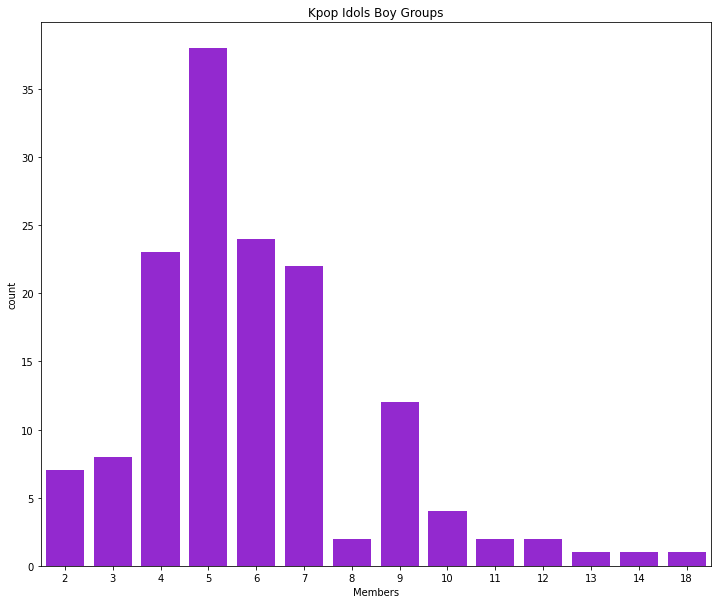

In [7]:
fig = plt.figure(figsize=[12,10])
sns.countplot(df['Members'], color=sns.xkcd_rgb['violet'])
plt.title('Kpop Idols Boy Groups')
plt.show()

In [ ]:
boy_groups =spark.read.load("./data/kpop_idols_boy_groups.csv", format="csv", header=True, inferSchema="True")

In [39]:
actif = boy_groups.filter(boy_groups["Active"]=="Yes")
dissou = boy_groups.filter(boy_groups["Active"]=="No")
suspendu = boy_groups.filter(boy_groups["Active"]=="Hiatus")

In [41]:
actif.count()

110

In [42]:
dissou.count()

33

In [43]:
suspendu.count()

4

In [47]:
labels = ['Yes','No','Hiatus']
values = [actif.count(), dissou.count(), suspendu.count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Groupe Masculin Actif')
fig.show()

In [48]:
df = pd.read_csv('./data/kpop_idols_girl_groups.csv', encoding='ISO-8859-2')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



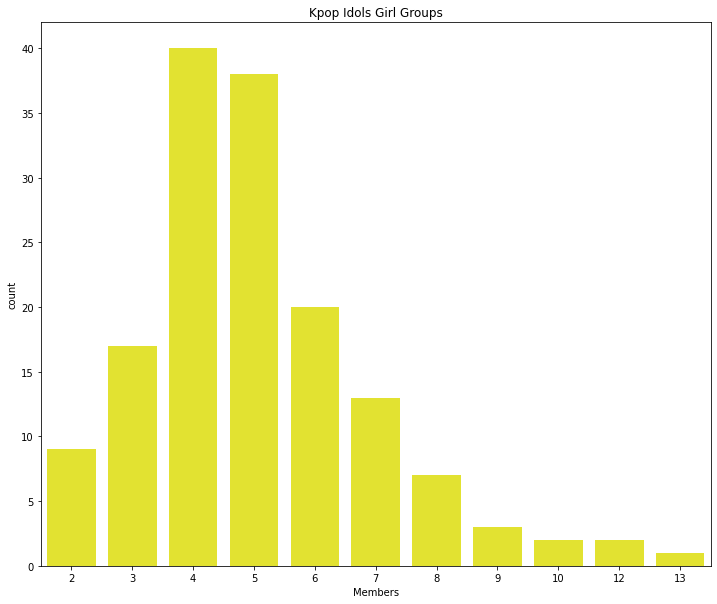

In [50]:
fig = plt.figure(figsize=[12,10])
sns.countplot(df['Members'], color=sns.xkcd_rgb['yellow'])
plt.title('Kpop Idols Girl Groups')
plt.show()

In [51]:
girl_groups =spark.read.load("./data/kpop_idols_girl_groups.csv", format="csv", header=True, inferSchema="True")

In [52]:
actif = girl_groups.filter(girl_groups["Active"]=="Yes")
dissou = girl_groups.filter(girl_groups["Active"]=="No")
suspendu = girl_groups.filter(girl_groups["Active"]=="Hiatus")

In [54]:
labels = ['Yes','No','Hiatus']
values = [actif.count(), dissou.count(), suspendu.count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Groupe Féminin Actif')
fig.show()

In [55]:
df = pd.read_csv('./data/kpop_idols.csv', encoding='ISO-8859-2')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



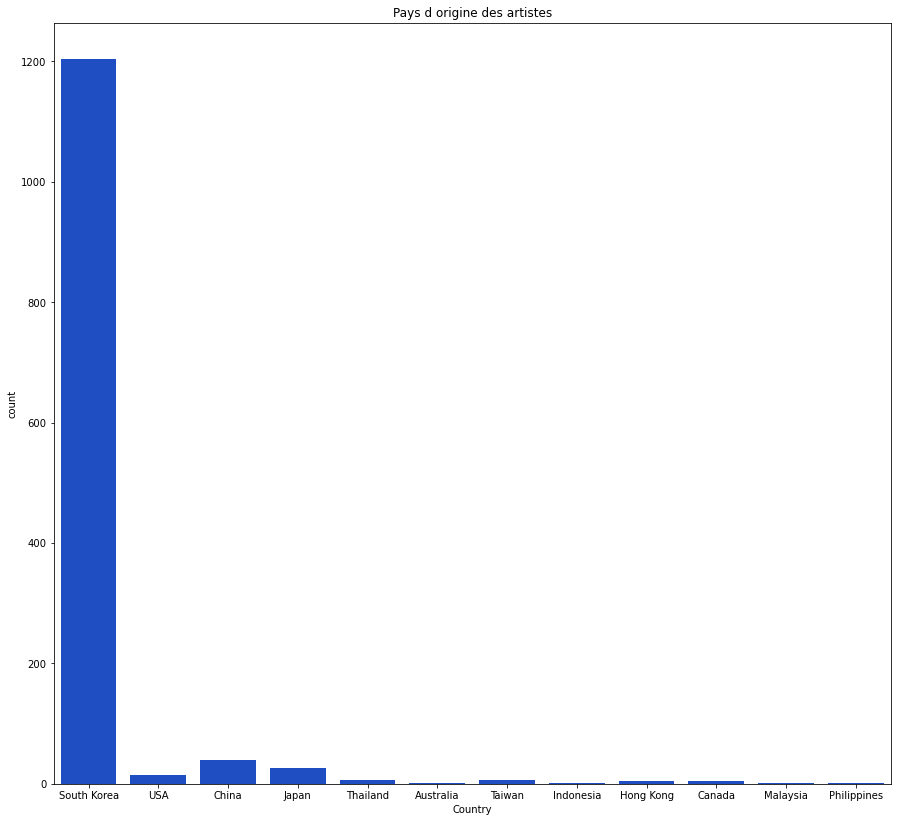

In [61]:
fig = plt.figure(figsize=[15,14])
sns.countplot(df['Country'], color=sns.xkcd_rgb['blue'])
plt.title('Pays d origine des artistes')
plt.show()

In [63]:
artiste =spark.read.load("./data/kpop_idols.csv", format="csv", header=True, inferSchema="True")

In [64]:
femme = artiste.filter(artiste["Gender"]=="F")
homme = artiste.filter(artiste["Gender"]=="M")

In [65]:
labels = ['Homme','Femme']
values = [homme.count(), femme.count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Répartition des genres des artistes')
fig.show()

In [73]:
music_videos =spark.read.load("./data/kpop_music_videos.csv", format="csv", header=True, inferSchema="True")

In [84]:
boy_solo_major = music_videos.filter((music_videos["Type"]=="Boy Solo") & (music_videos["Release"]=="Major"))
girl_solo_major = music_videos.filter((music_videos["Type"]=="Girl Solo") & (music_videos["Release"]=="Major"))
boy_major = music_videos.filter((music_videos["Type"]=="Boy") & (music_videos["Release"]=="Major"))
girl_major = music_videos.filter((music_videos["Type"]=="Girl") & (music_videos["Release"]=="Major"))

In [85]:
labels = ['Boy Solo Major','Girl Solo Major', 'Boy Group Major', 'Girl Group Major']
values = [boy_solo_major.count(), girl_solo_major.count(), boy_major.count(), girl_major.count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Répartition des genres des artistes par release')
fig.show()